<a href="https://colab.research.google.com/github/Gullen-Sw/Corpy-Co.inc-Assignment/blob/main/binary_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2998 files belonging to 2 classes.
Using 2399 files for training.
Found 2998 files belonging to 2 classes.
Using 599 files for validation.
Epoch 1/30
19/19 [==============================] - 15s 508ms/step - loss: 0.8910 - accuracy: 0.4852 - val_loss: 0.6947 - val_accuracy: 0.4908
Epoch 2/30
19/19 [==============================] - 13s 482ms/step - loss: 0.6937 - accuracy: 0.5269 - val_loss: 0.6877 - val_accuracy: 0.5092
Epoch 3/30
19/19 [==============================] - 13s 511ms/step - loss: 0.6801 - accuracy: 0.5561 - val_loss: 0.7079 - val_accuracy: 0.4908
Epoch 4/30
19/19 [==============================] - 13s 484ms/step - loss: 0.6939 - accuracy: 0.6028 - val_loss: 0.6711 - val_accuracy: 0.5693
Epoch 5/30
19/19 [==============================] - 13s 485ms/step - loss: 0.7085 - accuracy: 0.6228 - val_loss: 0.6608 - val_accuracy: 0.6494
Epoch 6/30
19/19 [==============================] - 13s 481ms/step - loss: 0.6125 - accuracy: 0.6786 - val_loss: 0.5674 - val_accuracy: 0.69

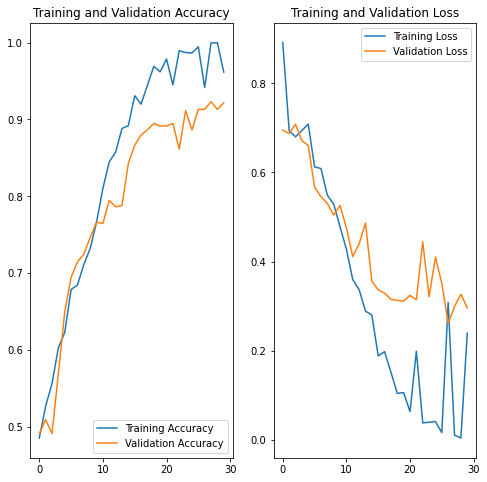

/content/drive/MyDrive/archive/test/origin/test_111.png
[6.5536233e-06]
/content/drive/MyDrive/archive/test/origin/test_102.png
[9.834948e-05]
/content/drive/MyDrive/archive/test/origin/test_117.png
[0.00024711]
/content/drive/MyDrive/archive/test/origin/test_119.png
[0.00378054]
/content/drive/MyDrive/archive/test/origin/test_107.png
[2.8156423e-05]
/content/drive/MyDrive/archive/test/origin/test_100.png
[0.00366696]
/content/drive/MyDrive/archive/test/origin/test_116.png
[0.33374536]
/content/drive/MyDrive/archive/test/origin/test_115.png
[0.03066899]
/content/drive/MyDrive/archive/test/origin/test_11.png
[0.00049555]
/content/drive/MyDrive/archive/test/origin/test_108.png
[0.0007574]
/content/drive/MyDrive/archive/test/origin/test_12.png
[0.00973928]
/content/drive/MyDrive/archive/test/origin/test_104.png
[0.00128991]
/content/drive/MyDrive/archive/test/origin/test_113.png
[0.00039552]
/content/drive/MyDrive/archive/test/origin/test_110.png
[0.01951293]
/content/drive/MyDrive/archiv

In [16]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg

batch_size = 128
validation_rate = 0.2
img_height = 256
img_width = 256

data_dir = '/content/drive/MyDrive/archive/train/normal/Augmentation/3000'
test_dir = '/content/drive/MyDrive/archive/test/origin'

"""
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

test_gen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

train_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    subset = 'training'
)

validation_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

test_generator = test_gen.flow_from_directory(
    test_dir, 
    target_size = (img_height, img_width)
)
"""

train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode = 'binary',
    validation_split = validation_rate,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split = validation_rate,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

model = keras.Sequential()
#model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)))
#model.add(layers.experimental.preprocessing.RandomRotation(1))
#model.add(layers.experimental.preprocessing.RandomZoom(1))
model.add(layers.experimental.preprocessing.Rescaling(1/255))
model.add(layers.Conv2D(16, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'),)
model.add(layers.Conv2D(16, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'))
model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'))
#model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu'))
#model.add(layers.MaxPooling2D(padding = 'same'))
model.add(layers.Flatten())
"""
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation = 'softmax'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation = 'sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation = 'relu'))
"""

model.add(layers.Dense(128, activation = "relu"))
#model.add(layers.Dense(64, activation = "relu" ))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid")) #As we have two classes

"""
model = Sequential([
    train_generator,
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation = 'sigmoid')
])
"""

epochs = 30
model.compile(optimizer = keras.optimizers.RMSprop(1e-3),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, batch_size = batch_size, epochs = epochs,  
                    validation_data = val_ds)
model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("/content/drive/MyDrive/archive/result.png")
plt.show()

lis_good = []
lis_ng = []

for file in os.listdir('/content/drive/MyDrive/archive/test/origin'):
    path = os.path.join('/content/drive/MyDrive/archive/test/origin', file)
    print(path)
    image = keras.preprocessing.image.load_img(
        path, target_size = (img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    print(predictions[0])

    if predictions[0,0] < 0.5:
        lis_good.append(file)
    else:
        lis_ng.append(file)

print('good : ' + str(lis_good))
print('not-good : ' + str(lis_ng))
    


In [17]:
model.save('/content/drive/MyDrive/archive/result/binary_result_3000/trial_Fin.h5')

In [15]:

print(predictions[0,0])

0.0002673566
